In [1]:
# load stuff:
import scipy.optimize as so
import datetime as dt

from dataload_helper import Dataset
from dataeval_helper import *  # load here also numpy, scipy,...
from global_params import *
from physics_helper import init_rh_calc_vals
#import cartopy.crs as ccrs


ERROR 1: PROJ: proj_create_from_database: Open of /sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/share/proj failed


In [2]:
#load Datasets



#Global Params
SETNAME1="MERRA2"
FILES1="../../../../../../work/mh0066/m301053/Data/MERRA2_instM_3d_asm_Np_all/MERRA2_*"
DATALOC_SPECIFIC1 = 'MERRA2_instM_3d_asm_Np_all/'
DATALOC1 = '../../../../../../work/mh0066/m301053/Data/' + DATALOC_SPECIFIC1

SETNAME2="JRA-55"
FILES2="../../../../../../work/mh0066/m301053/Data/JRA-55_Monthly_1.25_Deg_isobaric_sh/*.nc"
DATALOC_SPECIFIC2 = 'JRA-55_Monthly_1.25_Deg_isobaric_sh/'
DATALOC2 = '../../../../../../work/mh0066/m301053/Data/' + DATALOC_SPECIFIC2

RESLOC = './'
RESLOC_SPECIFIC = ''

TOPOANALYSIS=True
MASKELEVATION=True


OneGraph=False
#Times for analysis
t1_start='1980-01-01'
t1_end='1989-12-01'
t2_start='2010-01-01'
t2_end='2019-12-01'


t1='1980-01-01'
t2='2021-12-12'



#Location of radiosonde:

Name='GPM00078897'
lat=16.2639  
lon=-61.5164   



In [3]:
DS2 = Dataset(files=FILES1, setname = SETNAME1, dataloc = DATALOC1)
with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    DS2 = Dataset(files=FILES1, setname = SETNAME1, dataloc = DATALOC1)
    DS1 = Dataset(files=FILES2, setname = SETNAME2, dataloc = DATALOC2)

init_rh_calc_vals(DS1)
init_rh_calc_vals(DS2)

Loading full dataset MERRA2
<xarray.Dataset>
Dimensions:   (time: 522, p: 42, lat: 361, lon: 576)
Coordinates:
  * lat       (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * p         (p) float64 1e+03 975.0 950.0 925.0 900.0 ... 0.7 0.5 0.4 0.3 0.1
  * lon       (lon) float64 -180.0 -179.4 -178.8 -178.1 ... 178.1 178.8 179.4
  * time      (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2023-06-01
Data variables:
    RH_model  (time, p, lat, lon) float32 dask.array<chunksize=(1, 42, 361, 576), meta=np.ndarray>
    T         (time, p, lat, lon) float32 dask.array<chunksize=(1, 42, 361, 576), meta=np.ndarray>
    SH        (time, p, lat, lon) float32 dask.array<chunksize=(1, 42, 361, 576), meta=np.ndarray>
Attributes: (12/32)
    History:                           Original file generated: Thu May  7 22...
    Filename:                          MERRA2_100.instM_3d_asm_Np.198001.nc4
    Comment:                           GMAO filename: d5124_m2_jan79.inst3_3d...
    Conven

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-kptncg/lib/python3.10/site-packages/xarray/core/indexing.py:1440: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [4]:
with ProgressBar():
    DS1_point=dask.compute(DS1.ds.sel(lon=lon,lat=lat,method='nearest'))[0]
    DS2_point=dask.compute(DS2.ds.sel(lon=lon,lat=lat,method='nearest'))[0]
print(DS1_point,DS2_point)

#DS1_point.plot()


[########################################] | 100% Completed | 80.88 ss
[########################################] | 100% Completed | 10m 30s
<xarray.Dataset>
Dimensions:   (time: 768, p: 37)
Coordinates:
  * time      (time) datetime64[ns] 1958-01-01 1958-02-01 ... 2021-12-01
    lon       float64 -61.25
    lat       float64 16.25
  * p         (p) float64 1e+03 975.0 950.0 925.0 900.0 ... 7.0 5.0 3.0 2.0 1.0
Data variables:
    SH        (time, p) float32 0.01412 0.01375 0.01327 0.01243 ... nan nan nan
    RH_model  (time, p) float32 0.7609 0.8176 0.8702 0.8813 ... nan nan nan nan
    T         (time, p) float32 23.88 21.83 19.8 18.13 ... -28.96 -23.97 -13.58
    RH_calc   (time, p) float64 0.7593 0.8166 0.8704 0.8813 ... nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 2.0.6 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Mon Jul 31 12:51:58 2023: cdo -f nc --eccodes copy anl_p125...
    CDO:          Climate Data Operators version 2.

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)

In [5]:
# Load Radiosonde
d=np.loadtxt("./GPM00078897-drvd.txt")
#np.set_printoptions(threshold=)
ds=d[:,[0,-8]]
print(ds)

[[101700.    520.]
 [100000.    590.]
 [ 85000.    920.]
 ...
 [  1720. -99999.]
 [  1620. -99999.]
 [  1090. -99999.]]


In [6]:
def sort(data,ds,row):
    
    if row[1]==-99999:
        #print("Nan")
        return data
    
    for plev in data:
        #print('here',plev,plev[0],0.01*row[0])

        if plev[0]==0.01*row[0]:
            #print("insert")
            new=np.array([0.001*row[1]])
            plev[1]=np.append(plev[1],new,axis=0)
            plev[2]=plev[2]+1
            return data
            
        elif plev[0]==data[-1,0]:
            #print("new")
            new=np.array([[0.01*row[0],np.array([0.001*row[1]]),1]])
            data=np.append(data,new,axis=0)
            return data
        



In [7]:
#Create new array

row=ds[0]
data=np.array([[0.01*row[0],np.array([0.001*row[1]]),1]])
print(data)

#Sort
for row in ds:
        
        
        
        data=sort(data,ds,row)
        #if len(data[:,])>10:
        #    break

            
print(data)           

[[1017.0 array([0.52]) 1]]


/tmp/ipykernel_1237106/2671444058.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data=np.array([[0.01*row[0],np.array([0.001*row[1]]),1]])
/tmp/ipykernel_1237106/1088086374.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new=np.array([[0.01*row[0],np.array([0.001*row[1]]),1]])


[[1017.0
  array([0.52, 0.52, 0.56, 0.69, 0.76, 0.6 , 0.51, 0.62, 0.6 , 0.57, 0.6 ,
         0.71, 0.62, 0.6 , 0.58, 0.83, 0.91, 0.88, 0.84, 0.65, 0.95, 0.66,
         0.93, 0.92, 0.95, 0.72, 0.8 , 0.92, 0.88, 0.81, 0.7 , 0.65, 0.91,
         0.67, 0.72, 1.  , 0.73, 0.96, 0.9 , 0.89, 0.78, 0.64, 0.78, 0.93,
         0.89, 0.79, 0.68, 0.9 , 0.81, 0.91, 0.67, 0.84, 0.61, 0.9 , 0.9 ,
         0.93, 0.83, 0.8 , 0.94, 0.97, 0.75, 0.63, 0.69, 0.87, 0.76, 0.87,
         0.57, 0.89, 0.66, 0.6 , 0.76, 0.63, 0.91, 0.65, 0.94, 0.86, 0.93,
         0.57, 0.91, 0.55, 0.84, 0.7 , 0.6 , 0.51, 0.87, 0.58, 0.84, 0.74,
         0.57, 0.81, 0.84, 0.74, 0.91, 0.83, 0.9 , 0.79, 0.6 , 0.74, 0.84,
         0.86, 0.77, 0.76, 0.74, 0.85, 0.88, 0.79, 0.88, 0.84, 0.82, 0.82,
         0.78, 0.88, 0.96, 1.  , 0.83, 0.9 , 0.82, 0.96, 0.93, 0.89, 0.93,
         0.86, 0.87, 0.78, 0.78, 0.86, 0.84, 0.82, 0.84, 0.83, 0.98, 0.87,
         0.9 , 0.83, 0.95, 0.9 , 0.92, 0.83, 0.76, 0.77, 0.91, 0.83, 0.91,
         0.75, 0

In [8]:
sorted_indices = np.argsort(-data[:, 0])

# Use the indices to reorder the array
data = data[sorted_indices]

print(data)

[[1023.0 array([0.73]) 1]
 [1022.0 array([0.69]) 1]
 [1021.0 array([0.88, 0.91, 0.94, 0.85, 0.61, 0.8 , 0.61]) 7]
 ...
 [20.0 array([0.]) 1]
 [12.0 array([0.]) 1]
 [7.0 array([0.95]) 1]]


In [9]:


p = data[:,0]
means=np.array([np.mean(arr) for arr in data[:,1]])
stds=np.array([np.std(arr) for arr in data[:,1]])


mask = np.array([d >= 50 for d in data[:,2]])

#print(data_mean)

dsdfs


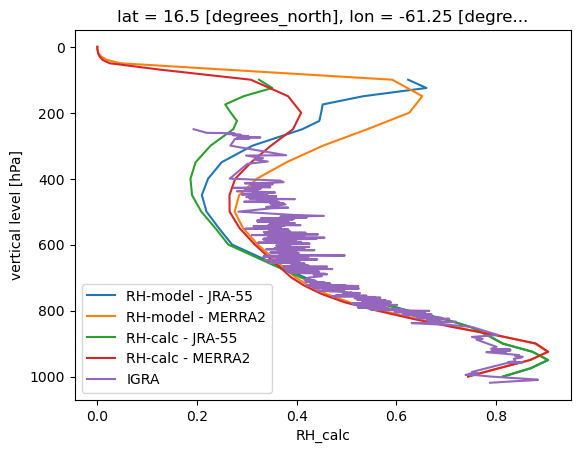

In [10]:
fig, ax = plt.subplots()



Rh1=DS1_point.sel(time=slice(t1,t2)).mean(('time'))
Rh2=DS2_point.sel(time=slice(t1,t2)).mean(('time'))
print("dsdfs")
Rh1.RH_model.plot(y='p',yincrease=False, label = 'RH-model - '+DS1.setname)
Rh2.RH_model.plot(y='p',yincrease=False, label = 'RH-model - '+DS2.setname)      
Rh1.RH_calc.plot(y='p',yincrease=False, label = 'RH-calc - '+DS1.setname)
Rh2.RH_calc.plot(y='p',yincrease=False, label = 'RH-calc - '+DS2.setname)      

ax.plot(means[mask],p[mask],label="IGRA")



#ax.set_yscale('log')
#ax.set_title('Zonal mean Temperature in different heights p')
ax.legend()
plt.savefig('Mean_RH_all.png',dpi=400)
plt.show()

